In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the iris dataset

In [3]:
df = pd.read_excel("iris (3).xls")

In [4]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

# Necessary Pre-processing steps

In [7]:
# checking the null values

In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
# Handelling missing values

<AxesSubplot:xlabel='SL', ylabel='Density'>

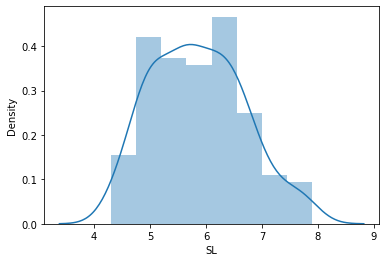

In [10]:
x=df['SL']
sns.distplot(x)

<AxesSubplot:xlabel='SW', ylabel='Density'>

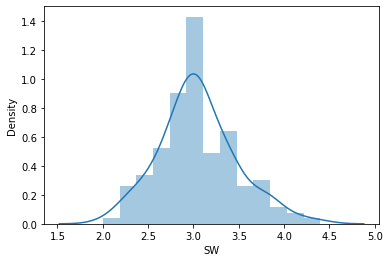

In [11]:
x=df['SW']
sns.distplot(x)

<AxesSubplot:xlabel='PL', ylabel='Density'>

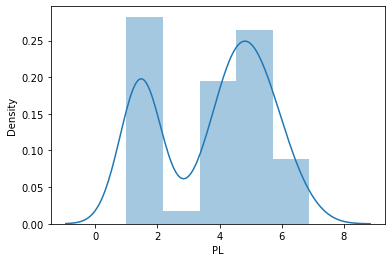

In [12]:
x=df['PL']
sns.distplot(x)

In [13]:
# we can handle the misssing values using median

In [14]:
df['SW']=df['SW'].fillna(df['SW'].median())
df['SL']=df['SL'].fillna(df['SL'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# label encoding of classification

In [17]:
from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
df['Classification']=class_en.fit_transform(df['Classification'])
df['Classification'].unique()

array([0, 1, 2])

Here it is labelled with Iris-setosa as 0, Iris-verscicolor as 1 and Iris-virginica as 2

In [18]:
# Splitting of dataset

In [19]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [20]:
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [22]:
x_train.shape

(105, 4)

In [23]:
x_test.shape

(45, 4)

In [24]:
y_train.shape

(105, 1)

In [25]:
y_test.shape

(45, 1)

# Findind out which classification model gives the best result to predict iris species.

# 1.Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
lt_model = LogisticRegression()
lt_model.fit(x_train,y_train)
y_pred = lt_model.predict(x_test)

In [27]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
accuracy_score(y_test,y_pred)

0.9777777777777777

In [28]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [29]:
#From confusion matrix we can infer that 19+12+13 = 44 out of 45 are predicted correctly.

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



accuracy score is 0.98, logistic fitting is a good fit for the data

# 2.kNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    Classifier.fit(x_train, y_train)
    y_pred = Classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

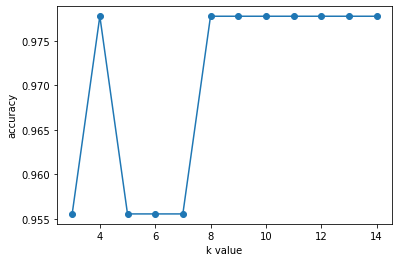

In [32]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

From graph we can see that k=4,6,7,8,9,10 etc has same accuracy level. choosing k=7

In [33]:
Classifier = KNeighborsClassifier(n_neighbors=7, metric = 'minkowski')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

In [34]:
print('accuracy_score is:',accuracy_score(y_test, y_pred))

accuracy_score is: 0.9555555555555556


In [35]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      0.92      0.92        13
           2       0.93      1.00      0.96        13

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



kNN is also a good fit for the given data with accuracy score as 0.96

# 3.Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)

In [38]:
print('accuracy_score is:',accuracy_score(y_test, y_pred))

accuracy_score is: 1.0


In [39]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Here the accuracy is 100% which might be due to overfitting

In [41]:
# Checking the test accuracy for training data to conclude about overfitting

In [42]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_test,y_test)
y_pred = dec_tree.predict(x_train)
accuracy_score(y_train,y_pred)

0.9142857142857143

In [ ]:
For training set, accuracy is 0.91. so we can conclude that accuracy 100% obtained is not due to overfitting¶

Decision Tree is one of the best fit for the given data

# 4. SVM

# Linear SVM

In [43]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)

In [44]:
print('accuracy_score is:',accuracy_score(y_test, y_pred))

accuracy_score is: 1.0


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [46]:
# Checking the test accuracy for training set to conclude about overfitting

In [47]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_train)
accuracy_score(y_train,y_pred)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.84      0.97      0.90        37
           2       0.97      0.81      0.88        37

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.93      0.92      0.92       105



For training set, the accuracy is 0.92. so we can conclude that accuracy 100% obtained is not due to overfitting

# Polynomial SVM

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)

In [49]:
print('accuracy_score is:',accuracy_score(y_test, y_pred))

accuracy_score is: 1.0


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [51]:
# Checking the test accuracy for training set to conclude about overfitting

In [52]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.94      0.81      0.87        37
           2       0.92      0.95      0.93        37

    accuracy                           0.91       105
   macro avg       0.91      0.92      0.91       105
weighted avg       0.92      0.91      0.91       105



For training test the accuracy is 0.91. so we can conclude that accuracy 100% obtained is not due to overfitting

# Radial SVM

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_test,y_test)
y_pred = svc.predict(x_test)

In [54]:
print('accuracy_score is:',accuracy_score(y_test, y_pred))

accuracy_score is: 0.9555555555555556


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.87      1.00      0.93        13
           2       1.00      0.92      0.96        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Here in SVM model linear & Polynomial fitting gives 100% accuracy. But radial gives as 0.96

# 5.Random frorest Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

1.0

In [58]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [60]:
# Checking the test accuracy for training set to conclude about overfitting

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_test,y_test)
y_pred=rf.predict(x_train)
accuracy_score(y_train,y_pred)

0.9428571428571428

In [62]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      0.92      0.92        37
           2       0.92      0.92      0.92        37

    accuracy                           0.94       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.94      0.94      0.94       105



For training set, the accuracy is 0.93. so the accuracy 100% obtained is not due to overfitting

In [63]:
# conclusion

So we can conclude that Models Decision Tree,Linear SVM,Polynomial SVM and Random Forest are the best fit for the given data.Models with accuracy_score one are tested for overfitting and found that its not overfitted. Models like Logisitc Regression, kNN and radial SVM can also be opted as its score is almost nearer to one
 